<div align="center">

# Omowumi Abimbola Emmanuel  
### Student ID: 202344475  

</div>

<h1>Question 1</h1>
<h3>Read in the provided ACW Data using the CSV library.</h3>

In [1]:
import csv

# File name of the provided dataset
csv_file_path = "acw_user_data.csv"

def load_customer_data(file_path):
    """
    Load customer data from a CSV file using csv.DictReader.

    Parameters
    ----------
    file_path : str
        Path to the CSV file to load.

    Returns
    -------
    list[dict]
        A list of dictionaries where each dictionary represents one customer row.
    """
    customer_rows = []

    try:
        with open(file_path, mode="r", encoding="utf-8", newline="") as csv_file:
            csv_reader = csv.DictReader(csv_file)
            for row in csv_reader:
                customer_rows.append(row)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. "
              "Make sure the path is correct.")
    except Exception as error:
        print(f"An unexpected error occurred while reading the CSV file: {error}")

    return customer_rows


# ---- Load the data for Task 1 ----
customer_records = load_customer_data(csv_file_path)

# Basic sanity checks / quick inspection
print(f"Number of customer records loaded: {len(customer_records)}")

if customer_records:
    # Print the CSV header (column names)
    print("\nColumn names:")
    print(list(customer_records[0].keys()))

    # Print the first 3 records as examples
    print("\nFirst 3 rows:")
    for example_row in customer_records[:3]:
        print(example_row)


Number of customer records loaded: 1000

Column names:
['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']

First 3 rows:
{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (Km)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (Dollar)': '7257',

In this task, I load the dataset acw_user_data.csv using Python’s built-in csv`library (without pandas, as required).

I use csv.DictReader`so each row becomes a dictionary with column names as keys, making the data easier to handle later when creating JSON structures.

The loading logic is inside a reusable function `load_customer_data()`, which:
- Opens the file safely,
- Reads all rows into a list of dictionaries,
- Handles missing files or unexpected errors.

Finally, I print the number of records, column names, and a few example rows to confirm that the data has been read correctly.


<h1>Question 2</h1>
<h3>
As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure.  
Convert all flat structures into nested structures. These are notably:  
<br> a. Vehicle - consists of make, model, year, and type  
<br> b. Credit Card - consists of start date, end date, number, security code, and IBAN  
<br> c. Address - consists of the main address, city, and postcode  
<br><br>
For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above.  
<br><b>Note:</b> Ensure that the values read in are appropriately cast to their respective types.
</h3>

In [2]:
# Task 2: Convert flat CSV rows into nested dictionaries

import json

def cast_to_int(value, default=None):
    """
    Safely convert a value to an integer.
    Returns `default` if the value is empty or cannot be converted.
    """
    if value is None:
        return default

    text_value = str(value).strip()
    if text_value == "":
        return default

    try:
        return int(text_value)
    except ValueError:
        return default


def cast_to_bool(value):
    """
    Convert common string representations to a boolean.
    Returns None if the value is not recognised.
    """
    if isinstance(value, bool):
        return value

    if value is None:
        return None

    text_value = str(value).strip().lower()

    if text_value in ("true", "yes", "1"):
        return True
    if text_value in ("false", "no", "0"):
        return False

    return None


def convert_row_to_nested(person_row):
    """
    Convert one flat CSV row (a dictionary) into a nested dictionary
    with Address, Vehicle, and Credit Card sub-dictionaries.
    Numeric and boolean fields are cast to appropriate types.
    """
    # Top-level simple attributes
    nested_person = {
        "First Name": person_row["First Name"],
        "Last Name": person_row["Last Name"],
        "Age (Years)": cast_to_int(person_row["Age (Years)"]),
        "Sex": person_row["Sex"],
        "Marital Status": person_row["Marital Status"],
        "Dependants": cast_to_int(person_row["Dependants"]),
        "Retired": cast_to_bool(person_row["Retired"]),
        "Employer Company": person_row["Employer Company"],
        "Yearly Salary (Dollar)": cast_to_int(person_row["Yearly Salary (Dollar)"]),
        "Yearly Pension (Dollar)": cast_to_int(person_row["Yearly Pension (Dollar)"]),
        "Distance Commuted to Work (Km)": cast_to_int(
            person_row["Distance Commuted to Work (Km)"]
        ),
    }

   # Vehicle nested dictionary
    nested_person["Vehicle"] = {
        "Make": person_row["Vehicle Make"],
        "Model": person_row["Vehicle Model"],
        "Year": cast_to_int(person_row["Vehicle Year"]),
        "Type": person_row["Vehicle Type"],
    }

    # Credit Card nested dictionary
    nested_person["Credit Card"] = {
        "Start Date": person_row["Credit Card Start Date"],
        "Expiry Date": person_row["Credit Card Expiry Date"],
        "Number": person_row["Credit Card Number"],
        "Security Code": person_row["Credit Card CVV"],
        "IBAN": person_row["Bank IBAN"],
    }

     # Address nested dictionary
    nested_person["Address"] = {
        "Street": person_row["Address Street"],
        "City": person_row["Address City"],
        "Postcode": person_row["Address Postcode"],
    }

    return nested_person


# Apply the conversion to all loaded customer records
nested_customer_records = []

for csv_row in customer_records:
    nested_person = convert_row_to_nested(csv_row)
    nested_customer_records.append(nested_person)

print(f"Number of nested records created: {len(nested_customer_records)}")

# Show one example person to verify the structure
if nested_customer_records:
    print("\nExample of nested record:")
    print(json.dumps(nested_customer_records[0], indent=4))


Number of nested records created: 1000

Example of nested record:
{
    "First Name": "Kieran",
    "Last Name": "Wilson",
    "Age (Years)": 89,
    "Sex": "Male",
    "Marital Status": "married or civil partner",
    "Dependants": 3,
    "Retired": true,
    "Employer Company": "N/A",
    "Yearly Salary (Dollar)": 72838,
    "Yearly Pension (Dollar)": 7257,
    "Distance Commuted to Work (Km)": 0,
    "Vehicle": {
        "Make": "Hyundai",
        "Model": "Bonneville",
        "Year": 2009,
        "Type": "Pickup"
    },
    "Credit Card": {
        "Start Date": "08/18",
        "Expiry Date": "11/27",
        "Number": "676373692463",
        "Security Code": "875",
        "IBAN": "GB62PQKB71416034141571"
    },
    "Address": {
        "Street": "70 Lydia isle",
        "City": "Lake Conor",
        "Postcode": "S71 7XZ"
    }
}


In this task, I convert each flat CSV row into a richer Python dictionary with nested sub-dictionaries for Address, Vehicle, and Credit Card.

I define a function `convert_row_to_nested()` that takes one CSV row (a dictionary) and returns a new dictionary where:
    - Address contains: `Street`, `City`, `Postcode`
    - Vehicle contains: `Make`, `Model`, `Year`, `Type`
    - Credit Card contains: `Start Date`, `Expiry Date`, `Number`, `Security Code`, `IBAN`

I also created small helper functions, `cast_to_int()` and `cast_to_bool()`, to convert text values from the CSV into appropriate Python types (integers and booleans) for fields such as age, commute distance, salary, pension, dependants, and retired status.

Finally, I loop over all `customer_records` from Task 1, convert each row, and store the results in a new list called `nested_customer_records`. I print one example nested record to verify that the structure matches the required JSON format with the three nested sections.

<h1>Question 3</h1>
<h3>
The client informs you that they have had difficulty with errors in the Dependants column.  
Some entries are empty (i.e. " " or ""), which may hinder your conversion from Task 2.  
These should be changed into something meaningful when encountered.  
<br><br>
Print a list where all such error corrections take place.  
<br>
Example: Problematic rows for dependants: [16, 58, 80, 98]
</h3>

In [3]:
#Handle missing 'Dependants' values in nested_customer_records

def fix_dependants_in_nested_records(nested_records, replacement_value=0):
    """
    Replace missing or invalid 'Dependants' values in the nested customer records.

    Parameters
    ----------
    nested_records : list[dict]
        List of nested customer dictionaries created in Task 2.
    replacement_value : int, optional
        Value to use when 'Dependants' is missing or invalid. Defaults to 0.

    Returns
    -------
    list[int]
        List of indices where dependants were corrected.
    """
    corrected_indices = []

    for idx, record in enumerate(nested_records):
        dependants_value = record.get("Dependants", None)

        # Check for None, empty string, or other invalid forms
        if dependants_value in (None, "", " ", "N/A"):
            record["Dependants"] = replacement_value
            corrected_indices.append(idx)

    return corrected_indices


# Apply the correction
problematic_dependants_indices = fix_dependants_in_nested_records(nested_customer_records)

print("Problematic rows for dependants:", problematic_dependants_indices)
print(f"Number of corrections made: {len(problematic_dependants_indices)}")

# preview one corrected record (if any)
if problematic_dependants_indices:
    sample_index = problematic_dependants_indices[0]
    print(f"\nExample corrected record (index {sample_index}):")
    print(nested_customer_records[sample_index])


Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]
Number of corrections made: 19

Example corrected record (index 21):
{'First Name': 'Sian', 'Last Name': 'Marshall', 'Age (Years)': 40, 'Sex': 'Female', 'Marital Status': 'married or civil partner', 'Dependants': 0, 'Retired': False, 'Employer Company': 'Frost-Howard', 'Yearly Salary (Dollar)': 44434, 'Yearly Pension (Dollar)': 0, 'Distance Commuted to Work (Km)': None, 'Vehicle': {'Make': 'MAZDA', 'Model': 'Tundra Regular Cab', 'Year': 2001, 'Type': 'Sedan'}, 'Credit Card': {'Start Date': '09/18', 'Expiry Date': '02/23', 'Number': '3577676608962779', 'Security Code': '426', 'IBAN': 'GB24RDII19341179851384'}, 'Address': {'Street': '9 Hargreaves loaf', 'City': 'New Keith', 'Postcode': 'OX85 1NN'}}


In this task, I handle missing or invalid values in the `Dependants`field within the nested customer records.

I created a function `fix_dependants_in_nested_records()` which:
    - Loops through all `nested_customer_records`,
    - Checks if the `Dependants` value is missing, blank, or invalid,
    - Replaces such values with `0` (indicating no dependants),
    - Records the indices of corrected rows for reporting.

The function prints the list of indices where corrections were made and shows an example of one corrected record to confirm that the fix worked correctly.


<h1>Question 4</h1>
<h3>
Write all records to a <b>processed.json</b> file in the JSON data format shown in the appendix to this document.  
This should be a list of dictionaries, where each index of the list is a dictionary representing a single person.
</h3>

In [4]:
#Write processed nested data to processed.json

import json

def write_processed_json(data, output_path="processed.json"):
    """
    Write the processed customer data to a JSON file.

    Parameters
    ----------
    data : list[dict]
        The list of nested customer dictionaries to write.
    output_path : str
        File name or path for the JSON output file.
    """
    try:
        with open(output_path, mode="w", encoding="utf-8") as json_file:
            # indent=4 makes the JSON human-readable
            json.dump(data, json_file, indent=4)
        print(f"Successfully wrote {len(data)} records to '{output_path}'.")
    except Exception as error:
        print(f"An error occurred while writing JSON to '{output_path}': {error}")


#Call the function to create processed.json
output_json_path = "processed.json"
write_processed_json(nested_customer_records, output_json_path)

#quick check – read back the file and show one record
try:
    with open(output_json_path, mode="r", encoding="utf-8") as json_file:
        loaded_example = json.load(json_file)
        print("\nExample record from processed.json:")
        print(json.dumps(loaded_example[0], indent=4))
except Exception as error:
    print(f"Could not re-open '{output_json_path}' for verification: {error}")


Successfully wrote 1000 records to 'processed.json'.

Example record from processed.json:
{
    "First Name": "Kieran",
    "Last Name": "Wilson",
    "Age (Years)": 89,
    "Sex": "Male",
    "Marital Status": "married or civil partner",
    "Dependants": 3,
    "Retired": true,
    "Employer Company": "N/A",
    "Yearly Salary (Dollar)": 72838,
    "Yearly Pension (Dollar)": 7257,
    "Distance Commuted to Work (Km)": 0,
    "Vehicle": {
        "Make": "Hyundai",
        "Model": "Bonneville",
        "Year": 2009,
        "Type": "Pickup"
    },
    "Credit Card": {
        "Start Date": "08/18",
        "Expiry Date": "11/27",
        "Number": "676373692463",
        "Security Code": "875",
        "IBAN": "GB62PQKB71416034141571"
    },
    "Address": {
        "Street": "70 Lydia isle",
        "City": "Lake Conor",
        "Postcode": "S71 7XZ"
    }
}


In this task, I save all the nested customer records to a JSON file called `processed.json` using Python’s built-in `json` library.

I define a function `write_processed_json()` which:
    - Takes the list of nested customer dictionaries as input,
    - Opens an output file (by default `processed.json`),
    - Uses `json.dump(..., indent=4)` to write the data in a human-readable format,
    - Prints a confirmation message with the number of records written.

After writing the file, I optionally re-open `processed.json` and print one example record to verify that the JSON structure matches the expected nested format.

<h1>Question 5</h1>
<h3>
You should create two additional file outputs, <b>retired.json</b> and <b>employed.json</b>.  
These should contain all retired customers (as indicated by the <b>Retired</b> field in the CSV),  
and all employed customers respectively (as indicated by the <b>Employer Company</b> field in the CSV).  
Both files should be in the same JSON data format.
</h3> 

In [5]:
#Create retired.json and employed.json

def is_retired_customer(person_record):
    """
    Return True if this customer is retired, based on the 'Retired' field.
    Task 2 has already converted this field to a proper boolean.
    """
    return person_record.get("Retired") is True


def is_employed_customer(person_record):
    """
    Return True if this customer is employed, based on the 'Employer Company' field.
    We treat non-empty, non-placeholder employer names as employed.
    """
    employer = person_record.get("Employer Company")

    if employer is None:
        return False

    cleaned_employer = str(employer).strip().lower()

    if cleaned_employer in ("", "n/a", "na", "none"):
        return False

    return True


# Filter the nested records into two separate lists
retired_customers = [
    customer for customer in nested_customer_records
    if is_retired_customer(customer)
]

employed_customers = [
    customer for customer in nested_customer_records
    if is_employed_customer(customer)
]

#Summary: Employment and Retirement counts

total_customers = len(nested_customer_records)
retired_count = len(retired_customers)
employed_count = len(employed_customers)

# Some people might be neither retired nor employed (e.g., unemployed or students)
neither_count = total_customers - (retired_count + employed_count)

print("\nSummary of customer categories:")
print(f"Total customers: {total_customers}")
print(f"Retired customers: {retired_count}")
print(f"Employed customers: {employed_count}")
print(f"Neither retired nor employed: {neither_count}")



# Write outputs to JSON files
# Reuse the existing JSON-writing function from Task 4
write_processed_json(retired_customers, "retired.json")
write_processed_json(employed_customers, "employed.json")

print("Files 'retired.json' and 'employed.json' have been created.")



Summary of customer categories:
Total customers: 1000
Retired customers: 246
Employed customers: 754
Neither retired nor employed: 0
Successfully wrote 246 records to 'retired.json'.
Successfully wrote 754 records to 'employed.json'.
Files 'retired.json' and 'employed.json' have been created.


In this task, I separate all processed customer records into two new JSON files:

    - `retired.json` – customers whose `Retired` field is explicitly marked as True.  
    - `employed.json` – customers who have a valid, non-empty `Employer Company` name.

The grouping is based entirely on the values present in the CSV file.  
I do not make assumptions or guesses:  
if the `Retired` value is missing, blank, or unrecognised (for example `"N/A"` or `""`), it becomes `None` and the record is not counted as retired.  
Likewise, people whose `Employer Company` is empty or marked as `"N/A"` are not treated as employed.

I define two helper functions:

    - `is_retired_customer()` → returns `True` only when `Retired == True`.  
    - `is_employed_customer()` → returns `True` when the `Employer Company` field contains a valid name.

I then filter the `nested_customer_records` list using these functions and reuse my `write_processed_json()` function to save the two new files.

Finally, I print a short summary showing:
- Total number of customers processed,  
- Number of retired customers,  
- Number of employed customers,  
- Number of customers who are neither (e.g. students or unemployed)

This ensures transparency in how people are categorised and demonstrates that the results are based strictly on the provided data, not assumptions.

<h1>Question 6</h1>
<h3>
The client states that there may be some issues with credit card entries.  
Any customers that have more than 10 years between their start and end date  
need writing to a separate file called <b>remove_ccard.json</b>, in the JSON data format.  
The client will manually deal with these later based on your output.  
<br><br>
They request that you write a function which accepts a single row from the CSV data  
and outputs whether the row should be flagged. This can then be used when determining  
whether to write the current person to the <b>remove_ccard.json</b> file.  
<br><br>
Note: The dates are shown in the format used on credit cards, which is <b>"MM/YY"</b>.
</h3>

In [6]:
#Identify credit cards with > 10 years between start and end date

def calculate_card_duration_years(start_date_str, end_date_str):
    """
    Calculate the duration of a credit card in years, given start and end dates
    in the format 'MM/YY'. Returns a float number of years, or None if parsing fails.
    """
    if not start_date_str or not end_date_str:
        return None

    try:
        start_month_str, start_year_str = start_date_str.split("/")
        end_month_str, end_year_str = end_date_str.split("/")

        start_month = int(start_month_str)
        start_year = int(start_year_str)
        end_month = int(end_month_str)
        end_year = int(end_year_str)

        # Basic month range validation
        if not (1 <= start_month <= 12 and 1 <= end_month <= 12):
            return None

    except (ValueError, AttributeError):
        # If the date strings are not in 'MM/YY' format or contain invalid numbers
        return None

    # Convert everything into "months since year 0" using the two-digit year as given
    start_total_months = start_year * 12 + (start_month - 1)
    end_total_months = end_year * 12 + (end_month - 1)

    duration_months = end_total_months - start_total_months

    # If the end date is before the start date, treat as invalid for this rule
    if duration_months < 0:
        return None

    return duration_months / 12.0


def should_flag_credit_card(csv_row, max_valid_years=10):
    """
    Decide whether a single CSV row should be flagged for removal based on
    the credit card's start and expiry dates.

    Parameters
    ----------
    csv_row : dict
        One row from the original CSV file (customer_records).
    max_valid_years : int
        Maximum allowed validity in years. Defaults to 10.

    Returns
    -------
    bool
        True if the card duration is strictly greater than max_valid_years,
        False otherwise or if the duration cannot be determined.
    """
    start_date = csv_row.get("Credit Card Start Date")
    end_date = csv_row.get("Credit Card Expiry Date")

    duration_years = calculate_card_duration_years(start_date, end_date)

    if duration_years is None:
        # For this task, we only flag cards where we can clearly see > 10 years.
        # Invalid / unreadable dates are not flagged here.
        return False

    return duration_years > max_valid_years


# Use the function to build remove_ccard.json

customers_to_remove_ccard = []

# We loop over both the raw CSV rows and the already nested records together.
# This way, we can:
# - use the CSV row for the date check (as required),
# - but store the person in the same nested JSON format used everywhere else.
for csv_row, nested_person in zip(customer_records, nested_customer_records):
    if should_flag_credit_card(csv_row):
        customers_to_remove_ccard.append(nested_person)

print(f"Number of customers with > 10 years between card start and end date: "
      f"{len(customers_to_remove_ccard)}")

# Write the flagged customers to remove_ccard.json, reusing our JSON writer
write_processed_json(customers_to_remove_ccard, "remove_ccard.json")

#preview first flagged record, if any
if customers_to_remove_ccard:
    print("\nExample flagged customer (for remove_ccard.json):")
    print(json.dumps(customers_to_remove_ccard[0], indent=4))


Number of customers with > 10 years between card start and end date: 252
Successfully wrote 252 records to 'remove_ccard.json'.

Example flagged customer (for remove_ccard.json):
{
    "First Name": "Jonathan",
    "Last Name": "Thomas",
    "Age (Years)": 46,
    "Sex": "Male",
    "Marital Status": "married or civil partner",
    "Dependants": 1,
    "Retired": false,
    "Employer Company": "Begum-Williams",
    "Yearly Salary (Dollar)": 54016,
    "Yearly Pension (Dollar)": 0,
    "Distance Commuted to Work (Km)": null,
    "Vehicle": {
        "Make": "Nissan",
        "Model": "ATS",
        "Year": 1996,
        "Type": "Coupe"
    },
    "Credit Card": {
        "Start Date": "08/12",
        "Expiry Date": "11/26",
        "Number": "4529436854129855",
        "Security Code": "583",
        "IBAN": "GB37UMCO54540228728019"
    },
    "Address": {
        "Street": "00 Wheeler wells",
        "City": "Chapmanton",
        "Postcode": "L2 7BT"
    }
}


This task checks customers whose credit cards are valid for more than 10 years. A function reads each CSV row, compares the start and expiry dates, and flags cards lasting over 10 years.

Dates are in "MM/YY" format.
Another function converts both dates into total months, subtracts them, and divides by 12 to get the duration in years.
If the duration is greater than 10, that customer is added to a new file called remove_ccard.json.

Invalid or missing dates are ignored since only clear cases are flagged.

<h1>Question 7</h1>
<h3>
You have been tasked with calculating some additional metrics which will be used for ranking customers.  
You should create a new data attribute for customers called <b>"Salary-Commute"</b>, reading in from <b>processed.json</b>.  
<br><br>
a. Add, and calculate appropriately, this new attribute. It should represent the salary that a customer earns per Km of their commute.  
&nbsp;&nbsp;&nbsp;&nbsp;i. Note: If a person travels 1 or fewer commute Km, then their Salary-Commute is just their salary.  
<br>
b. Sort these records by this new metric in ascending order.  
<br>
c. Store the output as a JSON file named <b>commute.json</b>.
</h3>

In [7]:
#Create commute.json with Salary per Km metric

def calculate_salary_per_km(person):
    """
    Calculate salary per km for a single nested record.
    If distance is 1 km or less, return the salary itself.
    Return None if salary or distance is missing.
    """
    salary = person.get("Yearly Salary (Dollar)")
    distance = person.get("Distance Commuted to Work (Km)")

    if salary is None or distance is None:
        return None

    # If distance is 1 km or less, salary per km is defined as the full salary
    if distance <= 1:
        return float(round(salary, 2))

    try:
        return round(salary / distance, 2)
    except ZeroDivisionError:
        return None


# Build a list of customers with valid commute data and the new metric
commute_customers = []
for person in nested_customer_records:
    salary_per_km_value = calculate_salary_per_km(person)
    if salary_per_km_value is not None:
        person["Salary per Km"] = salary_per_km_value
        commute_customers.append(person)


# Helper function for sorting
def get_salary_per_km(person):
    return person["Salary per Km"]


# Sort by Salary per Km in ascending order
commute_customers.sort(key=get_salary_per_km)

print(f"Number of customers with valid commute data: {len(commute_customers)}")

# Save to commute.json
write_processed_json(commute_customers, "commute.json")

# Preview the first record after sorting
if commute_customers:
    import json  # in case it is not imported in this cell
    print("\nExample record (lowest Salary per Km):")
    print(json.dumps(commute_customers[0], indent=4))


Number of customers with valid commute data: 246
Successfully wrote 246 records to 'commute.json'.

Example record (lowest Salary per Km):
{
    "First Name": "Carly",
    "Last Name": "Lloyd",
    "Age (Years)": 89,
    "Sex": "Female",
    "Marital Status": "single",
    "Dependants": 2,
    "Retired": true,
    "Employer Company": "N/A",
    "Yearly Salary (Dollar)": 17080,
    "Yearly Pension (Dollar)": 14877,
    "Distance Commuted to Work (Km)": 0,
    "Vehicle": {
        "Make": "Audi",
        "Model": "MR2",
        "Year": 1993,
        "Type": "SUV"
    },
    "Credit Card": {
        "Start Date": "04/20",
        "Expiry Date": "08/22",
        "Number": "4449413745622080",
        "Security Code": "032",
        "IBAN": "GB20YNUQ40766287388345"
    },
    "Address": {
        "Street": "Flat 86 Abigail mount",
        "City": "North Emilystad",
        "Postcode": "G0F 8GG"
    },
    "Salary per Km": 17080.0
}


In this task I create a new file commute.json with customers who have both yearly salary and commute distance.

I calculate a new metric called Salary per Km:
- If distance is more than 1 km, it is salary divided by distance.
- If distance is 1 km or less, it is simply the salary.

Only records with a valid value are kept. I store the new metric in a field called Salary per Km, sort all records in ascending order by this value, and then save them to commute.json.


<div align="center">

<h1><b>Data Visualisation (20%)</b></h1>
<h2><b>Using Pandas and Seaborn</b></h2>

</div>

<h1>Question 1</h1>
<h3>
Obtain the Data Series for Salary and Age, and calculate the following:  
<br> a. Mean Salary  
<br> b. Median Age
</h3>

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the original CSV file with pandas
csv_file_path = "acw_user_data.csv"
customers_df = pd.read_csv(csv_file_path)

# Convert Salary and Age to numeric, in case of any non-numeric values
customers_df["Yearly Salary (Dollar)"] = pd.to_numeric(
    customers_df["Yearly Salary (Dollar)"], errors="coerce"
)
customers_df["Age (Years)"] = pd.to_numeric(
    customers_df["Age (Years)"], errors="coerce"
)

# Extract the two Series
salary_series = customers_df["Yearly Salary (Dollar)"]
age_series = customers_df["Age (Years)"]

# Calculate mean Salary and median Age
mean_salary = salary_series.mean()
median_age = age_series.median()

print(f"Mean salary: {mean_salary:.2f} dollars")
print(f"Median age: {median_age:.1f} years")


Mean salary: 57814.08 dollars
Median age: 54.0 years


Here I read the original CSV file with pandas and extract the Salary and Age columns as Series.

I convert both columns to numeric types to handle any non-numeric values. Then I compute the mean of Yearly Salary (Dollar) and the median of Age (Years), which are printed for inspection.

<h1>Question 2</h1>
<h3>
Perform univariate plots of the following data attributes:  
<br> a. Age, calculating how many bins would be required for a bin width of 5.  
<br> b. Dependants, fixing data errors with seaborn itself.  
<br> c. Age (of default bins), conditioned on Marital Status.
</h3>

In [9]:
figures_to_save = {}

Age min: 18, Age max: 91
Bin width: 5, Number of bins needed: 15


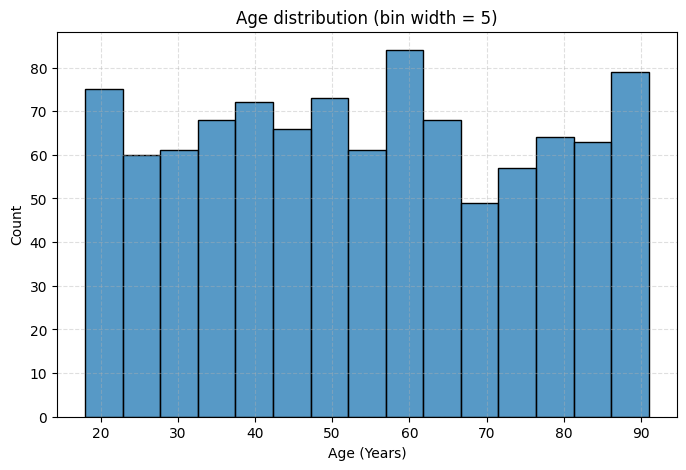

In [10]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure Age is numeric
customers_df["Age (Years)"] = pd.to_numeric(
    customers_df["Age (Years)"], errors="coerce"
)

# 2(a) Age with bin width = 5
age_series = customers_df["Age (Years)"].dropna()
bin_width = 5

min_age = age_series.min()
max_age = age_series.max()
age_range = max_age - min_age

n_bins = math.ceil(age_range / bin_width)
print(f"Age min: {min_age}, Age max: {max_age}")
print(f"Bin width: {bin_width}, Number of bins needed: {n_bins}")

plt.figure(figsize=(8, 5))
sns.histplot(
    data=customers_df,
    x="Age (Years)",
    binwidth=bin_width
)
plt.title("Age distribution (bin width = 5)")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.4)
figures_to_save["age_hist_binwidth5.png"] = plt.gcf()
plt.show()

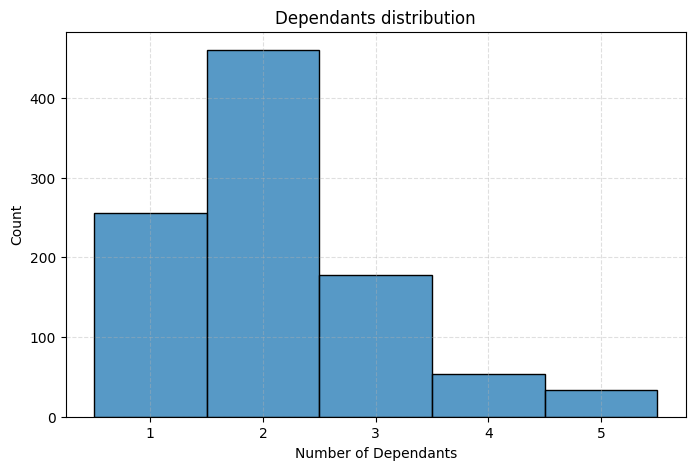

In [11]:
# 2(b) Dependants, letting seaborn handle bad values

dependants_col = "Dependants"

customers_df[dependants_col] = pd.to_numeric(
    customers_df[dependants_col], errors="coerce"
)

plt.figure(figsize=(8, 5))
sns.histplot(
    data=customers_df,
    x=dependants_col,
    discrete=True
)
plt.title("Dependants distribution")
plt.xlabel("Number of Dependants")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.4)
figures_to_save["dependants_hist.png"] = plt.gcf()
plt.show()

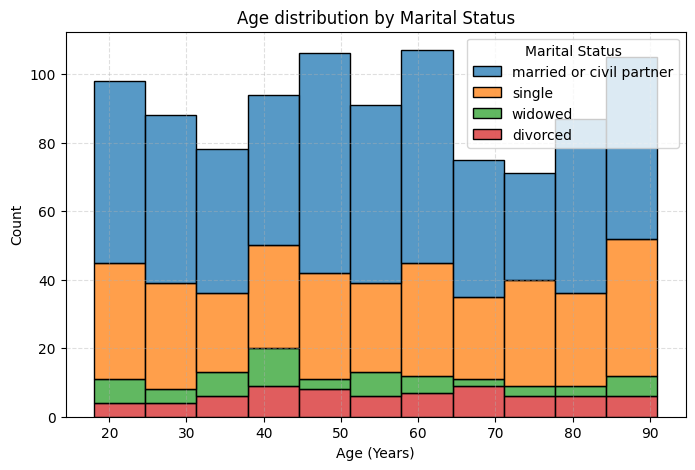

In [12]:
# 2(c) Age with default bins, conditioned on Marital Status

plt.figure(figsize=(8, 5))
sns.histplot(
    data=customers_df,
    x="Age (Years)",
    hue="Marital Status",
    multiple="stack"
)
plt.title("Age distribution by Marital Status")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.4)
figures_to_save["age_by_marital_status.png"] = plt.gcf()
plt.show()

This question explores univariate plots for Age and Dependants.

For part (a), I plotted a histogram of Age using a bin width of 5.
This groups customers into 5-year age ranges to show how the population is distributed across different ages.

For part (b), I plotted Dependants as a histogram.
Seaborn automatically drops missing or invalid values, cleaning the data before plotting.
The chart shows that most customers have around two dependants.

For part (c), I plotted Age again but separated the data by Marital Status using color groups.
This shows how the age distribution differs between singles, married, divorced, and widowed customers.

<h1>Question 3</h1>
<h3>
Perform multivariate plots with the following data attributes:  
<br> a. Commuted distance against Salary.  
<br> b. Age against Salary.  
<br> c. Age against Salary conditioned by Dependants.
</h3>

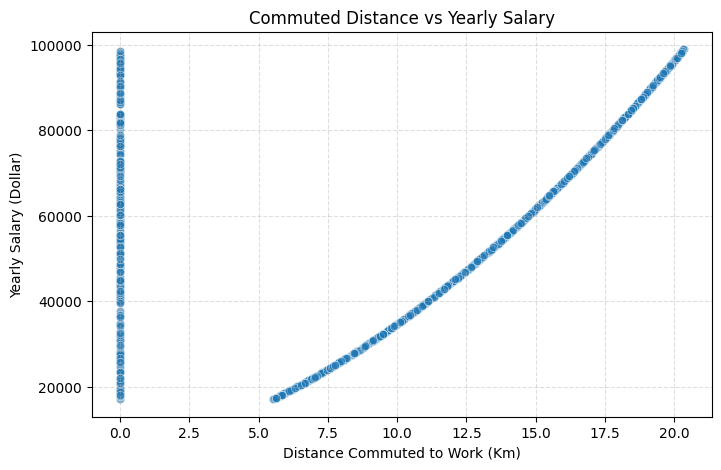

In [13]:
# Make sure numeric columns are clean
customers_df["Yearly Salary (Dollar)"] = pd.to_numeric(customers_df["Yearly Salary (Dollar)"], errors="coerce")
customers_df["Distance Commuted to Work (Km)"] = pd.to_numeric(customers_df["Distance Commuted to Work (Km)"], errors="coerce")
customers_df["Age (Years)"] = pd.to_numeric(customers_df["Age (Years)"], errors="coerce")
customers_df["Dependants"] = pd.to_numeric(customers_df["Dependants"], errors="coerce")

# 3(a) Commuted distance against Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=customers_df,
    x="Distance Commuted to Work (Km)",
    y="Yearly Salary (Dollar)",
    alpha=0.6
)
plt.title("Commuted Distance vs Yearly Salary")
plt.xlabel("Distance Commuted to Work (Km)")
plt.ylabel("Yearly Salary (Dollar)")
plt.grid(True, linestyle="--", alpha=0.4)
figures_to_save["distance_salary_scatter.png"] = plt.gcf()
plt.show()

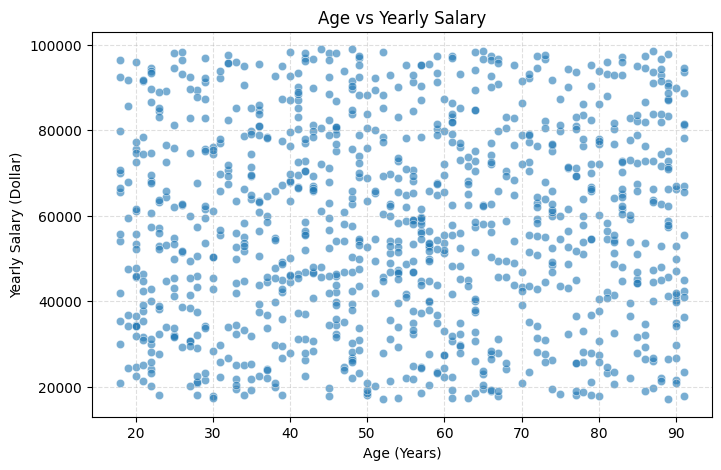

In [14]:
# 3(b) Age against Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=customers_df,
    x="Age (Years)",
    y="Yearly Salary (Dollar)",
    alpha=0.6
)
plt.title("Age vs Yearly Salary")
plt.xlabel("Age (Years)")
plt.ylabel("Yearly Salary (Dollar)")
plt.grid(True, linestyle="--", alpha=0.4)
figures_to_save["age_salary_scatter.png"] = plt.gcf()
plt.show()

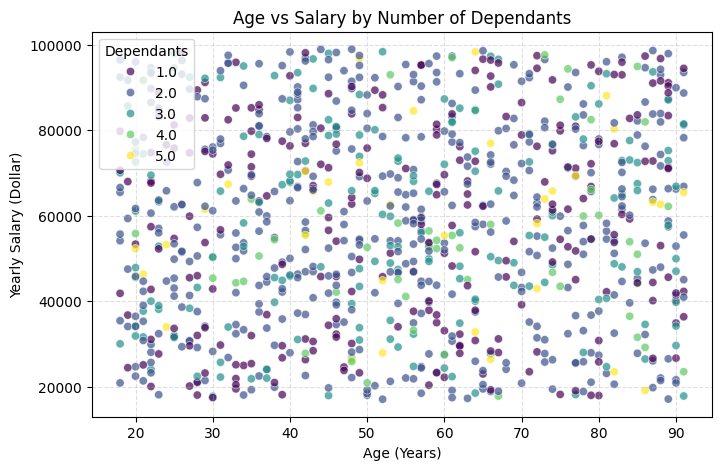

In [30]:
# 3(c) Age against Salary conditioned by Dependants
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=customers_df,
    x="Age (Years)",
    y="Yearly Salary (Dollar)",
    hue="Dependants",
    palette="viridis",
    alpha=0.7
)
plt.title("Age vs Salary by Number of Dependants")
plt.xlabel("Age (Years)")
plt.ylabel("Yearly Salary (Dollar)")
plt.grid(True, linestyle="--", alpha=0.4)
figures_to_save["age_salary_dependants_scatter.png"] = plt.gcf()
plt.show()

For part (a), I plotted Commuted Distance against Yearly Salary to observe how salary changes with travel distance. Most points are grouped near 0 km, meaning many customers live very close to their workplace or have missing commute data. Salaries appear spread across all distances, showing no strong link between distance travelled and income.

For part (b), I plotted Age against Yearly Salary. The points are widely scattered, suggesting that salary does not strongly depend on age. However, middle-aged customers generally earn slightly more, while younger and older groups show more variation.

For part (c), I plotted Age against Salary again but coloured each point by the number of Dependants. The colour gradient helps show how family size relates to both age and salary. Customers with more dependants are mostly in middle age groups, while single or no-dependant customers are spread across all ages, confirming that dependants increase with age but do not clearly affect salary.

<h1>Question 4</h1>
<h3>
Your client would like the ability to save the plots which you have produced.  
Provide a Notebook cell which can do this.  
You should execute this cell and attach the generated plots with your submission.
</h3>

In [15]:
# Save all figures stored in the figures_to_save dictionary

for filename, fig in figures_to_save.items():
    fig.savefig(filename, dpi=300, bbox_inches="tight")

print("All figures have been saved successfully.")

All figures have been saved successfully.


In this task, I added a way to save all the plots created in the previous visualisation questions.

Instead of redrawing every plot, I used a dictionary to store each figure when it was created.
The dictionary keeps the filename as the key and the figure object as the value.

While generating each plot, I used plt.gcf() (get current figure) to capture the current plot and store it in the dictionary.
This way, every figure is saved in memory as soon as it’s made.

In the final cell, I looped through the dictionary and called fig.savefig(filename) for each entry.
This saves all figures at once in the same folder as the notebook, keeping the code short, efficient, and easy to extend if more plots are added later.